In [53]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

# Load Model    

In [54]:
# Load the model
model = keras.models.load_model('../fitmotion_model_reduced.keras')
labels = ['dws', 'jog', 'sit', 'std', 'ups', 'wlk']

# Loading The Data

### Native Android Data

In [55]:
# Load Android Data
data_source = 'android_data_cleaned'
data_type = 'wlk'
data_num = '4'
data_url = '../data/' + data_source + '/' + data_type + '/' + data_type + '_' + data_num + '.csv'

df = pd.read_csv(data_url, sep=',')
df = df.drop(['Unnamed: 0'], axis=1) if 'Unnamed: 0' in df.columns else df
df = df.drop(['id'], axis=1) if 'id' in df.columns else df
df

,Attitude Roll,Attitude Pitch,Attitude Azimuth,Gravity X,Gravity Y,Gravity Z,Rotation Rate X,Rotation Rate Y,Rotation Rate Z,User Acceleration X,User Acceleration Y,User Acceleration Z
0,-0.344128,-2.939821,-1.813954,-1.983571,-9.108812,3.043906,-0.086417,-0.344736,0.284018,-0.044231,-0.074709,-0.016775
1,-0.344128,-2.939821,-1.813954,-1.983571,-9.108812,3.043906,-0.749125,-0.151263,0.152461,-0.044231,-0.074709,-0.016775
2,-0.344128,-2.939821,-1.813954,-1.983571,-9.108812,3.043906,-0.749125,-0.151263,0.152461,-0.044231,-0.074709,-0.016775
3,-0.344128,-2.939821,-1.813954,-1.983571,-9.108812,3.043906,-0.749125,-0.151263,0.152461,-0.044231,-0.074709,-0.016775
4,-0.321210,-2.920565,-2.078385,-2.092468,-9.068789,3.090148,-0.749125,-0.151263,0.152461,-0.029428,-0.114925,-0.268176
...,...,...,...,...,...,...,...,...,...,...,...,...
1946,-0.195736,-2.979054,-2.465907,-1.428701,-9.442306,2.229812,1.316229,-0.601590,0.527157,0.132260,0.110927,0.113691
1947,-0.195736,-2.979054,-2.465907,-1.428701,-9.442306,2.229812,1.316229,-0.601590,0.527157,0.132260,0.110927,0.113691
1948,-0.195736,-2.979054,-2.465907,-1.428701,-9.442306,2.229812,1.316229,-0.601590,0.527157,0.132260,0.110927,0.113691
1949,-0.087583,-2.883929,-2.329424,-1.910193,-8.451045,4.593625,1.316229,-0.601590,0.527157,-0.081977,0.180186,0.365741


### Web iPhone Data

In [56]:
# Load Android Data
data_source = 'html_data'
device_source = 'iphone'
data_type = 'sit'
data_num = '1'
data_url = '../data/' + data_source + '/' + device_source + '/' + data_type + '/' + data_type + '_' + data_num + '.csv'

df = pd.read_csv(data_url, sep=',')
df = df.drop(['Unnamed: 0'], axis=1) if 'Unnamed: 0' in df.columns else df
df = df.drop(['id'], axis=1) if 'id' in df.columns else df
df = df.drop(['Timestamp'], axis=1) if 'Timestamp' in df.columns else df
df = df.drop(['Attitude Roll'], axis=1) if 'Attitude Roll' in df.columns else df
df = df.drop(['Attitude Pitch'], axis=1) if 'Attitude Pitch' in df.columns else df
df = df.drop(['Attitude Azimuth'], axis=1) if 'Attitude Azimuth' in df.columns else df
df = df.drop(['Rotation Rate X'], axis=1) if 'Rotation Rate X' in df.columns else df
df = df.drop(['Rotation Rate Y'], axis=1) if 'Rotation Rate Y' in df.columns else df
df = df.drop(['Rotation Rate Z'], axis=1) if 'Rotation Rate Z' in df.columns else df
df

,Gravity X,Gravity Y,Gravity Z,User Acceleration X,User Acceleration Y,User Acceleration Z
0,-6.28,-2.72,-6.30,0.00,0.32,0.60
1,-6.45,-2.97,-6.45,-0.16,0.10,0.42
2,-6.28,-2.97,-6.72,0.01,0.15,0.12
3,-6.36,-3.19,-7.45,-0.02,-0.04,-0.67
4,-6.70,-4.13,-7.57,-0.29,-0.95,-0.87
...,...,...,...,...,...,...
2096,-1.45,-5.70,-7.76,-0.06,0.15,-0.02
2097,-1.94,-5.75,-7.09,-0.57,0.09,0.67
2098,-1.68,-6.04,-7.58,-0.31,-0.20,0.18
2099,-1.52,-5.91,-7.87,-0.17,-0.09,-0.10


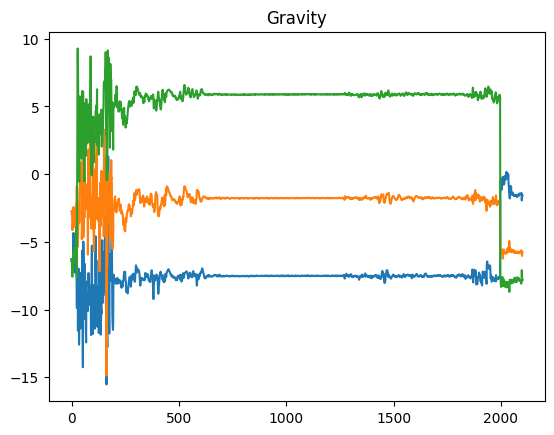

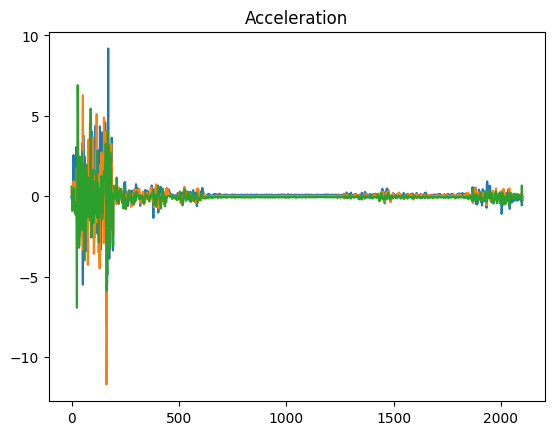

In [57]:
# Plot data
plt.title('Gravity')
plt.plot(df['Gravity X'])
plt.plot(df['Gravity Y'])
plt.plot(df['Gravity Z'])
plt.show()

plt.title('Acceleration')
plt.plot(df['User Acceleration X'])
plt.plot(df['User Acceleration Y'])
plt.plot(df['User Acceleration Z'])
plt.show()

In [58]:
# Remove Unknown Data
df = df.iloc[500:1700]

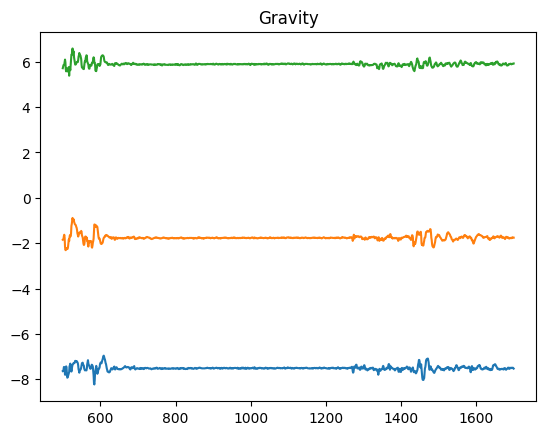

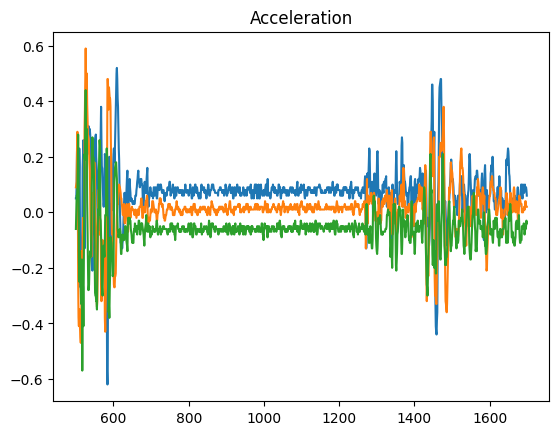

In [59]:
# Plot data
plt.title('Gravity')
plt.plot(df['Gravity X'])
plt.plot(df['Gravity Y'])
plt.plot(df['Gravity Z'])
plt.show()

plt.title('Acceleration')
plt.plot(df['User Acceleration X'])
plt.plot(df['User Acceleration Y'])
plt.plot(df['User Acceleration Z'])
plt.show()

### Original Data

In [61]:
# Load Orignal Data (for comparison)
data_source_o = 'dataset'
data_type_o = 'sit_5'
data_num_o = '1'
data_url_o = '../data/' + data_source_o + '/' + data_type_o + '/' + 'sub_' + data_num_o + '.csv'

df_o = pd.read_csv(data_url_o)
df_o = df_o.drop(['Unnamed: 0'], axis=1) if 'Unnamed: 0' in df_o.columns else df_o
df_o = df_o.drop(['attitude.roll'], axis=1) if 'attitude.roll' in df_o.columns else df_o
df_o = df_o.drop(['attitude.pitch'], axis=1) if 'attitude.pitch' in df_o.columns else df_o
df_o = df_o.drop(['attitude.yaw'], axis=1) if 'attitude.yaw' in df_o.columns else df_o
df_o = df_o.drop(['rotationRate.x'], axis=1) if 'rotationRate.x' in df_o.columns else df_o
df_o = df_o.drop(['rotationRate.y'], axis=1) if 'rotationRate.y' in df_o.columns else df_o
df_o = df_o.drop(['rotationRate.z'], axis=1) if 'rotationRate.z' in df_o.columns else df_o
df_o

,gravity.x,gravity.y,gravity.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,0.314588,0.404381,-0.858784,0.000094,0.000252,-0.006954
1,0.314649,0.404445,-0.858732,-0.001309,0.002262,-0.010348
2,0.314567,0.404560,-0.858708,-0.002174,0.000012,-0.006664
3,0.314286,0.404740,-0.858726,0.001693,0.009216,-0.011575
4,0.314271,0.404894,-0.858658,0.005767,0.007490,-0.008926
...,...,...,...,...,...,...
10287,0.344357,0.358687,-0.867619,0.000004,0.007707,-0.003506
10288,0.343920,0.359324,-0.867528,-0.002688,0.006063,0.003011
10289,0.343255,0.360411,-0.867341,0.001548,0.019090,-0.007339
10290,0.342652,0.360835,-0.867403,0.004180,0.016942,-0.019789


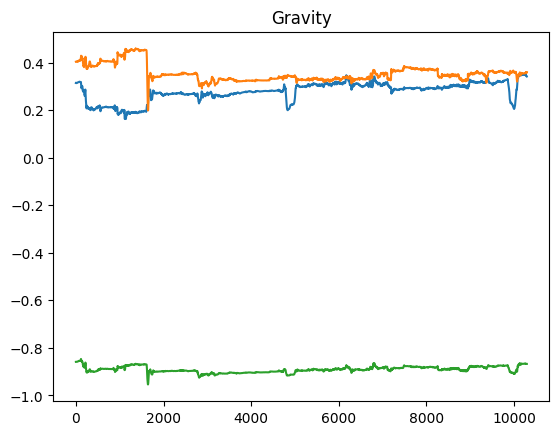

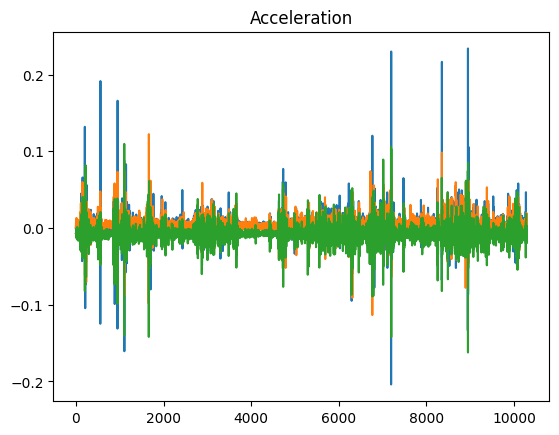

In [62]:
# Plot data
plt.title('Gravity')
plt.plot(df_o['gravity.x'])
plt.plot(df_o['gravity.y'])
plt.plot(df_o['gravity.z'])
plt.show()

plt.title('Acceleration')
plt.plot(df_o['userAcceleration.x'])
plt.plot(df_o['userAcceleration.y'])
plt.plot(df_o['userAcceleration.z'])
plt.show()

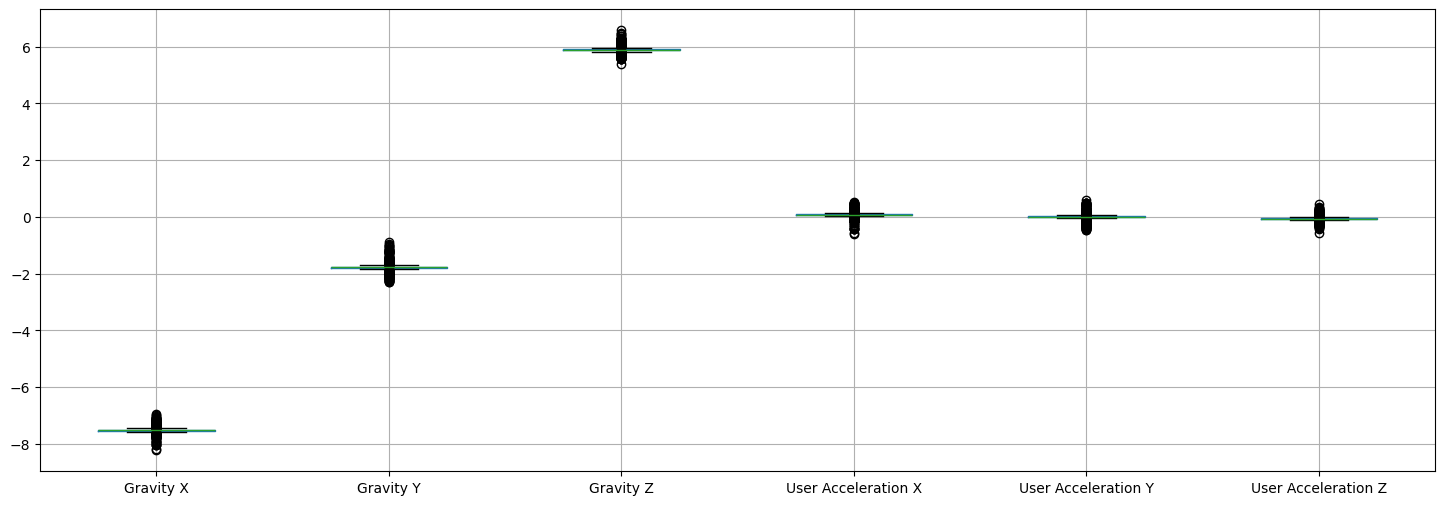

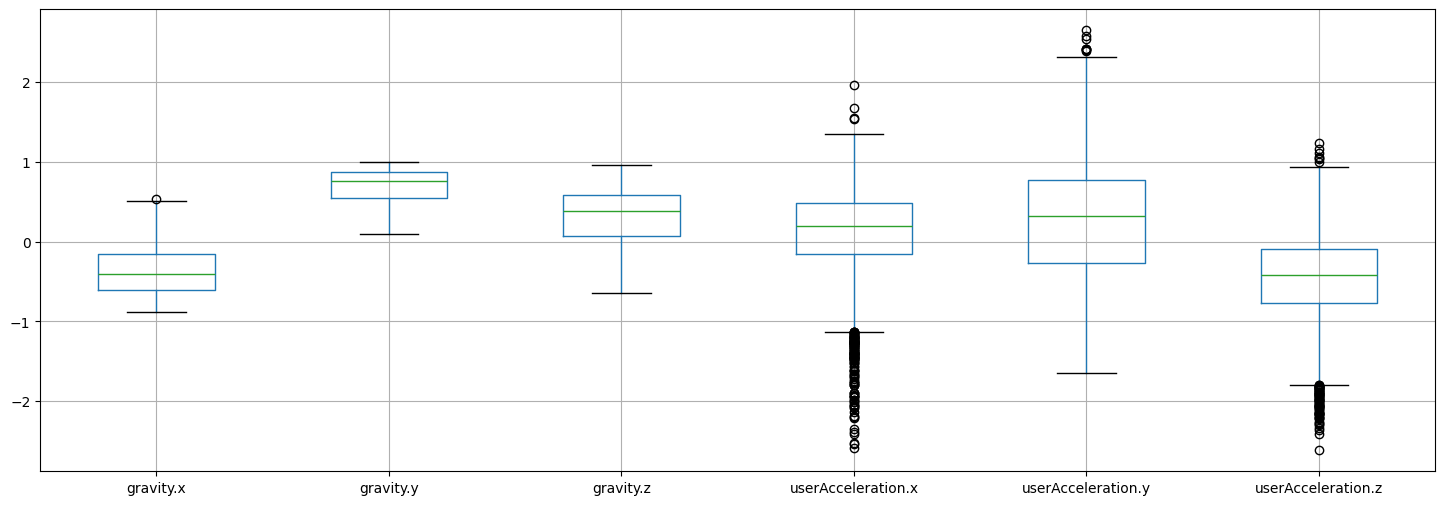

In [15]:
# boxplot
plt.figure(figsize=(18, 6)) 
df.boxplot()
plt.show()

# boxplot
plt.figure(figsize=(18, 6))
df_o.boxplot()
plt.show()

In [77]:
# opening scaling factor file to read the dictionary
with open('../constants.txt', 'r') as f:
    lines = f.readlines()
    scaling_factors = eval(lines[0])

scaling_factors

{'Attitude Roll': 0.1142376591444776,
 'Attitude Pitch': 6.743238035682087,
 'Attitude Azimuth': -0.41661325633781365,
 'Gravity X': -0.40567461707781854,
 'Gravity Y': -0.09295193616982254,
 'Gravity Z': -0.10113856668202935,
 'Rotation Rate X': -1.4943574681964766,
 'Rotation Rate Y': -1.2789613806297648,
 'Rotation Rate Z': -1.6287858288885937,
 'User Acceleration X': -0.0263404192567685,
 'User Acceleration Y': 0.11506888215007838,
 'User Acceleration Z': 0.14220148004175853}

In [78]:
# Multiply data with constants
for i in range(len(df.columns)):
    df.iloc[:, i] = df.iloc[:, i] * scaling_factors[df.columns[i]]

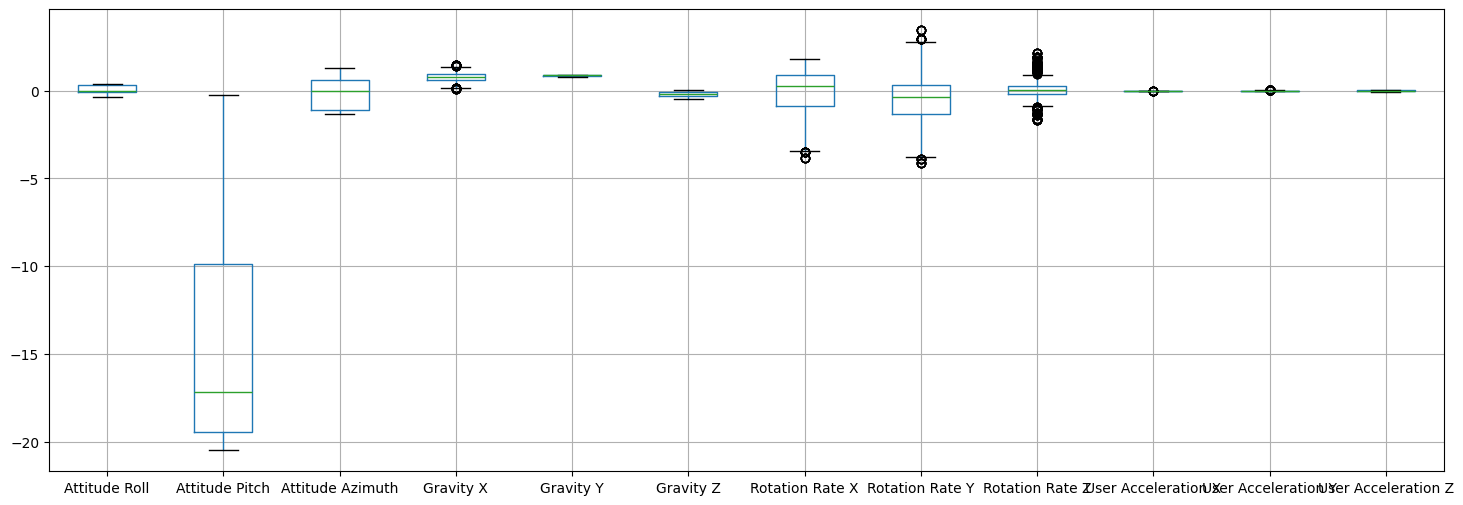

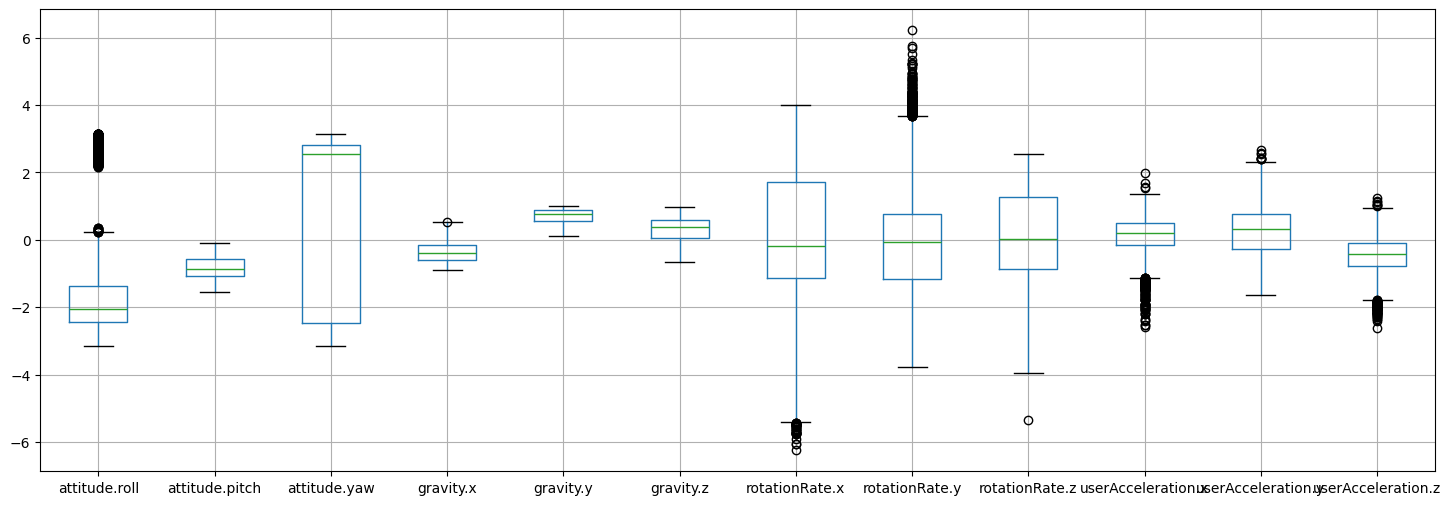

In [79]:
# boxplot
plt.figure(figsize=(18, 6)) 
df.boxplot()
plt.show()

# boxplot
plt.figure(figsize=(18, 6))
df_o.boxplot()
plt.show()

In [80]:
df.head(    )

,Attitude Roll,Attitude Pitch,Attitude Azimuth,Gravity X,Gravity Y,Gravity Z,Rotation Rate X,Rotation Rate Y,Rotation Rate Z,User Acceleration X,User Acceleration Y,User Acceleration Z
0,-0.039312,-19.823916,0.755717,0.804684,0.846682,-0.307856,0.129138,0.440904,-0.462604,0.001165,-0.008597,-0.002385
1,-0.039312,-19.823916,0.755717,0.804684,0.846682,-0.307856,1.119461,0.193460,-0.248327,0.001165,-0.008597,-0.002385
2,-0.039312,-19.823916,0.755717,0.804684,0.846682,-0.307856,1.119461,0.193460,-0.248327,0.001165,-0.008597,-0.002385
3,-0.039312,-19.823916,0.755717,0.804684,0.846682,-0.307856,1.119461,0.193460,-0.248327,0.001165,-0.008597,-0.002385
4,-0.036694,-19.694066,0.865883,0.848861,0.842962,-0.312533,1.119461,0.193460,-0.248327,0.000775,-0.013224,-0.038135


In [81]:
df_o.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,-1.711140,-1.429168,-2.591433,-0.139767,0.989987,0.019745,-0.350593,-0.511691,-0.865217,0.091702,0.415881,0.093689
1,-1.787917,-1.414171,-2.630956,-0.152324,0.987759,0.033602,-0.550553,-2.243217,-0.582409,0.367412,0.004566,-0.106082
2,-1.897323,-1.399331,-2.706668,-0.161610,0.985336,0.054729,-0.931014,-1.358033,-0.503947,0.172093,-0.217483,-0.163387
3,-2.018375,-1.383279,-2.813421,-0.168058,0.982470,0.080680,-1.304668,-0.541368,-0.346302,0.004957,-0.237566,-0.019080
4,-2.124395,-1.364054,-2.913092,-0.174613,0.978705,0.107922,-1.278349,-0.434722,-0.398598,-0.040292,-0.241461,0.015201


# Preprocessing Data

In [82]:
# Prepare the data
WINDOW_LENGTH = 150
STRIDE_LENGTH = 10
NUM_CLASSES = 6
NUM_FEATURES = 12
BATCH_SIZE = 100
EPOCHS_SIZE = 10

In [83]:
from scipy.stats import mode

def sequence_generator(x, length, stride):
    seq_x = []
    data_length = len(x)

    for i in range(0, data_length - length + 1, stride):
        input_sequence = x.iloc[i : i + length]
        seq_x.append(input_sequence)
    return np.array(seq_x)

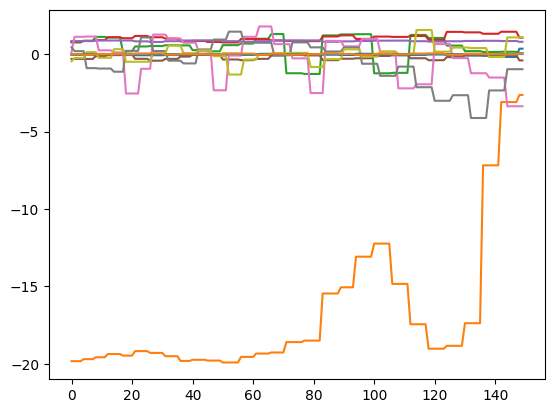

In [84]:
# Checking data
import matplotlib.pyplot as plt

tx = sequence_generator(df, WINDOW_LENGTH, STRIDE_LENGTH)
plt.plot(tx[0])
plt.show()

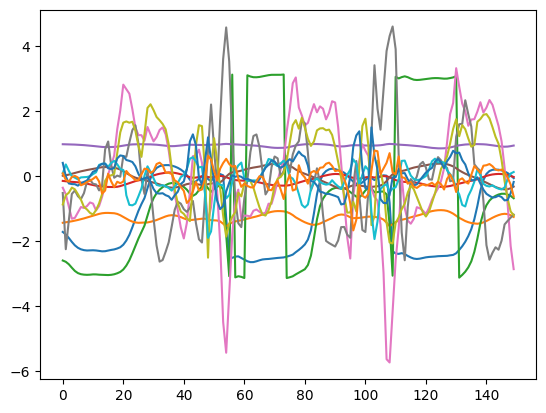

In [85]:
txc = sequence_generator(df_o, WINDOW_LENGTH, STRIDE_LENGTH)
plt.plot(txc[0])
plt.show()

# Prediction

In [86]:
# Predict the data
y_pred = model.predict(tx)

# Get the most frequent label
y_pred = np.argmax(y_pred, axis=1)
y_pred = mode(y_pred)[0]
labels[y_pred]

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'dws'